## Vertex functions

This code calculates the vertex functions from random-phase-approximation
of copolymer melts.

In [1]:
from CORRcalc import s2wlc, s2inverse, s3wlc, s4wlc, norm
from itertools import product
import propagator 
import numpy as np
from scipy import optimize

In [2]:
%matplotlib inline
import mpld3
import matplotlib.pyplot as plt
mpld3.enable_notebook()

In [3]:
def r2(N):
    return N - 0.5*(1-np.exp(-2*N))

In [4]:
def spinodal(N, fa):
    CHI = 0
    K0 = 1/np.sqrt(r2(N))
    
    KS = optimize.fmin(lambda K: gamma2(pset, N, fa, K, CHI), K0,\
                      disp=False)
    
    return KS

## Quadratic vertex

In [5]:
def gamma2(pset, N, fa, K, CHI):
    s2inv = s2inverse(pset, N, fa, K)

    D = [1,-1]    # sign indicator
    G = 0
    for I0, I1 in product([0,1], repeat=2):
        G += s2inv[I0, I1]*D[I0]*D[I1]
        
    return -2*CHI + N*G

In [6]:
N=10
fa=0.5

nlam=4
pset=propagator.prop_set(nlam=nlam)

K = 10
CHI = 0

KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))

for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, fa, K, CHI)

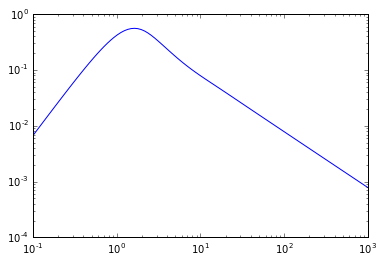

In [7]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [8]:
# N = 10
# FAV = np.linspace(.1, .9, 10)
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(N, FA)

/Users/shifan/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:517: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[k] = func(sim[k])
/Users/shifan/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:542: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxe
/Users/shifan/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:558: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxc
/Users/shifan/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:568: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxcc
/Users/shifan/Library/Python/2.7/lib/python/site-packages/scipy/optimize/optimize.py:545: ComplexWarning: Casting complex values to real discards the imaginary part
  fsim[-1] = fxr


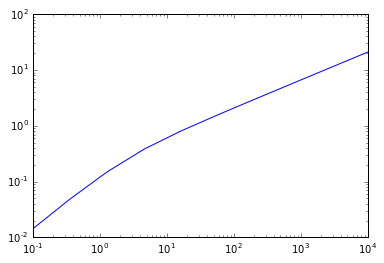

In [9]:
plt.loglog(NV, 1/KSV)
plt.show()

## Cubic Vertex

In [10]:
def gamma3(pset, N, fa, Ks):
    K1, K2, K3 = Ks
    if norm(K1+K2+K3) >= 1e-10:
        raise('Qs must add up to zero')
        
    if not abs(norm(K1)-norm(K2)) < 1e-5 \
        and abs(norm(K2)-norm(K3)) < 1e-5:
        (abs(norm(K1) - norm(K2)))
        raise('Qs must have same length')
    
    K = norm(K1)
    s3 = s3wlc(pset, N, fa, Ks)
    s2inv = s2inverse(pset, N, fa, K)
    
    val = 0
    for I0, I1, I2 in product([0,1], repeat=3):
        val -= s3[I0][I1][I2]* (s2inv[I0][0] - s2inv[I0][1])*\
                               (s2inv[I1][0] - s2inv[I1][1])*\
                               (s2inv[I2][0] - s2inv[I2][1])

    return val*(N**2)

In [16]:
N = 10

nlam = 20
pset=propagator.prop_set(nlam=nlam)

FAV = np.linspace(.2, .5, 21)
GAM3 = np.zeros((len(FAV)))
KSV = np.zeros((len(FAV)))

def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2

    Ks = [k1, k2, k3]
    return Ks

for ind, fa in enumerate(FAV):
    KS = spinodal(N, fa)
    Ks = set3Ks(KS)

    KSV[ind] = KS
    GAM3[ind] = gamma3(pset, N, fa, Ks)

1.83753780066


/Users/shifan/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


1.80921241971
1.7843722646
1.76238365791
1.74299312866
1.72569373493
1.71035874121
1.69673467655
1.68456806996
1.67379555372
1.66429039232
1.65598921804
1.64870192764
1.64236515337
1.63704226299
1.63260652101
1.62899455968
1.62620637901
1.62430534673
1.62310135962
1.62272115316


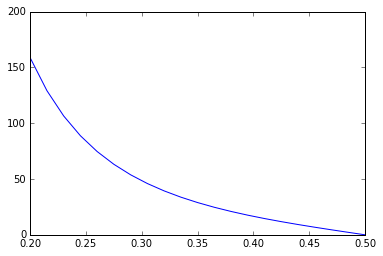

In [12]:
plt.plot(FAV, -N*GAM3)
plt.axis([.2,.5,0,200])
plt.show()

## Quartic Vertex

In [18]:
def gamma4(pset, N, fa, Ks):
    K1, K2, K3, K4 = Ks
    if not (norm(K1) == norm(K2) == norm(K3) == norm(K4)):
        raise('Qs must have same length')
    
    K = norm(K1)
    K12 = norm(K1+K2)
    K13 = norm(K1+K3)
    K14 = norm(K1+K4)
    
    s4 = s4wlc(pset, N, fa, Ks)
    s31 = s3wlc(pset, N, fa, [K1, K2, -K1-K2])
    s32 = s3wlc(pset, N, fa, [K1, K3, -K1-K3])
    s33 = s3wlc(pset, N, fa, [K1, K4, -K1-K4])
    
    s2inv = s2inverse(pset, N, fa, K)
    s21inv = s2inverse(pset, N, fa, K12)
    s22inv = s2inverse(pset, N, fa, K13)
    s23inv = s2inverse(pset, N, fa, K14)
    
    G4 = np.zeros((2,2,2,2),dtype=type(1+1j))
    for a1, a2, a3, a4 in product([0,1], repeat=4):
        for I0, I1 in product([0,1], repeat=2):
            G4[a1][a2][a3][a4] += \
                s31[a1][a2][I0]*s31[a3][a4][I1]*s21inv[I0][I1] + \
                s32[a1][a2][I0]*s32[a3][a4][I1]*s22inv[I0][I1] + \
                s33[a1][a2][I0]*s33[a3][a4][I1]*s23inv[I0][I1]
    G4 -= s4
    
    val = 0
    for I0, I1, I2, I3 in product([0,1], repeat=4):
        val += G4[I0][I1][I2][I3] *\
                (s2inv[I0][0] - s2inv[I0][1])*\
                (s2inv[I1][0] - s2inv[I1][1])*\
                (s2inv[I2][0] - s2inv[I2][1])*\
                (s2inv[I3][0] - s2inv[I3][1])
                
    return val*(N**3)

In [22]:
N = 10

nlam = 1
pset=propagator.prop_set(nlam=nlam)

FAV = np.linspace(.2, .5, 21)
GAM4 = np.zeros((len(FAV)))
KSV = np.zeros((len(FAV)))

def set4Ks(K):
    k1=np.array([0,0,1])*K
    k2=np.array([0,0,1])*K
    k3=-k1
    k4=-k2

    k = [k1, k2, k3, k4]
    return k

for ind, fa in enumerate(FAV):
    KS = spinodal(N, fa)
    Ks = set4Ks(KS)

    KSV[ind] = KS
    GAM4[ind] = gamma4(pset, N, fa, Ks)

3.67507560132
0.0
0.0


/Users/shifan/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


3.61842483942
0.0
0.0
3.5687445292
0.0
0.0
3.52476731582
0.0
0.0
3.48598625733
0.0
0.0
3.45138746986
0.0
0.0
3.42071748242
0.0
0.0
3.3934693531
0.0
0.0
3.36913613993
0.0
0.0
3.34759110743
0.0
0.0
3.32858078465
0.0
0.0
3.31197843608
0.0
0.0
3.29740385527
0.0
0.0
3.28473030675
0.0
0.0
3.27408452599
0.0
0.0
3.26521304202
0.0
0.0
3.25798911936
0.0
0.0
3.25241275801
0.0
0.0
3.24861069345
0.0
0.0
3.24620271923
0.0
0.0
3.24544230632
0.0
0.0


In [23]:
GAM4

array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])